In [1]:
import wrangle as w
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("zillow.csv")

In [3]:
df.shape

(2152863, 8)

In [3]:
df["fips"] = df.fips.map({6037: "LA", 6059: "Orange", 6111: "Ventura"})

In [4]:
df

,Unnamed: 0,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0,0.0,0.0,NaN,27516.0,NaN,NaN,LA
1,1,0.0,0.0,NaN,10.0,NaN,NaN,LA
2,2,0.0,0.0,NaN,10.0,NaN,NaN,LA
3,3,0.0,0.0,NaN,2108.0,NaN,174.21,LA
4,4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,LA
...,...,...,...,...,...,...,...,...
2152858,2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,Orange
2152859,2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,Orange
2152860,2152860,0.0,0.0,NaN,208057.0,NaN,5783.88,Orange
2152861,2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,Orange


In [21]:
df = w.split_clean_zillow(df)

1590 outliers removed from bedroom.
8559 outliers removed from bathroom.
4412 outliers removed from area.
18673 outliers removed from property_value.
16 outliers removed from year.
21610 outliers removed from tax.

Total of 54860 outliers removed.


In [22]:
df

,bedroom,bathroom,area,property_value,year,tax,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,LA
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,LA
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,LA
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,LA
14,0.0,0.0,171.0,6920.0,1973.0,255.17,LA
...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,LA
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,Orange
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,Orange
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,Orange


In [6]:
# all the dtypes are floats
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117066 entries, 4 to 2152862
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 129.2 MB


In [8]:
df.shape

(2117066, 7)

In [9]:
# bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount -- missing values
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
count,2.117066e+06,2.117066e+06,2.117066e+06,2.117066e+06,2.117066e+06,2.117066e+06,2.117066e+06
mean,3.282486e+00,2.201356e+00,1.815770e+03,4.181719e+05,1.960777e+03,5.129794e+03,6.048344e+03
std,9.048330e-01,8.991788e-01,8.092988e+02,3.709293e+05,2.197949e+01,4.271248e+03,2.038386e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,2.200000e+01,1.874000e+03,6.340000e+00,6.037000e+03
25%,3.000000e+00,2.000000e+00,1.254000e+03,1.875082e+05,1.949000e+03,2.523400e+03,6.037000e+03
50%,3.000000e+00,2.000000e+00,1.615000e+03,3.248790e+05,1.958000e+03,4.075380e+03,6.037000e+03
75%,4.000000e+00,3.000000e+00,2.182000e+03,5.250000e+05,1.975000e+03,6.306040e+03,6.059000e+03
max,7.000000e+00,6.000000e+00,6.749000e+03,3.169000e+06,2.016000e+03,3.687268e+04,6.111000e+03


In [10]:
# drop nulls
df = df.dropna()
# check nulls are removed
df.isnull().sum()
# new shape (2140235, 8)
df.shape

(2117066, 7)

In [11]:
# change data types to int, except taxamount needs to remain float
# df = df.astype({"bedroomcnt": "int", "calculatedfinishedsquarefeet": "int", "taxvaluedollarcnt": "int", "yearbuilt": "int", "fips": "int"})
# reset index
df = df.reset_index()

In [ ]:
# keep original index in case we need to refer back to the orginal index
df_or_index = df

In [13]:
#drop index and propertylandusetypeid
df = df.drop(columns="index")

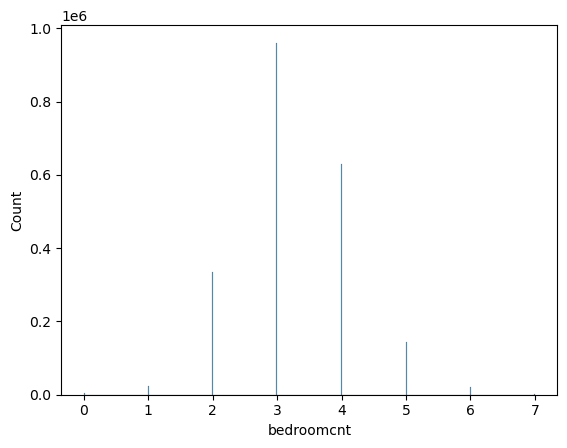

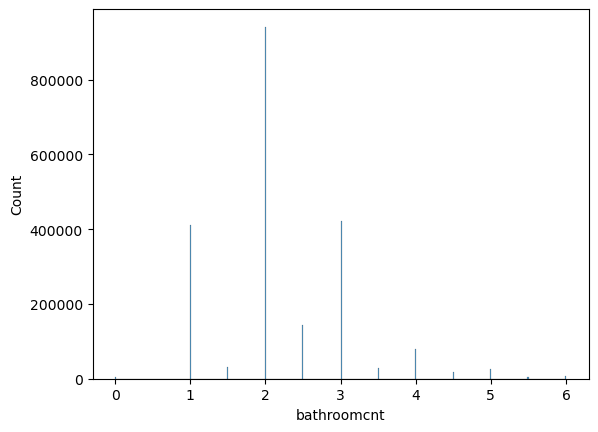

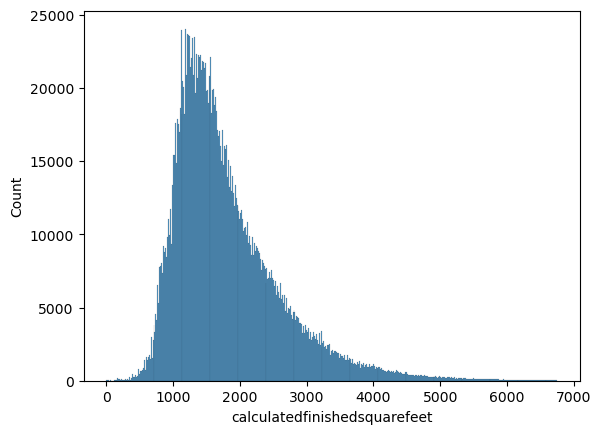

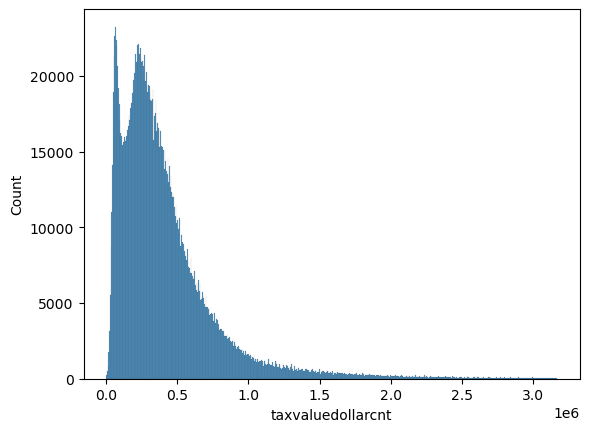

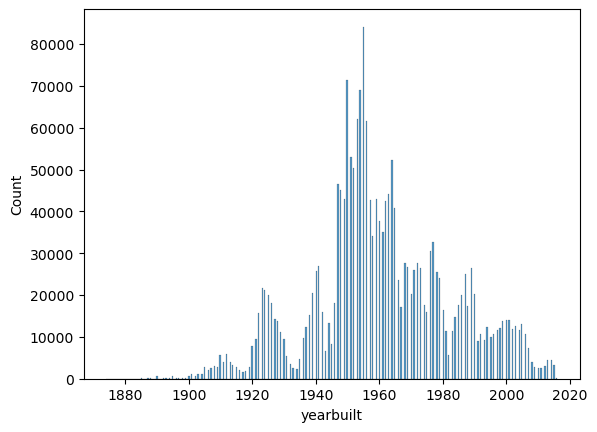

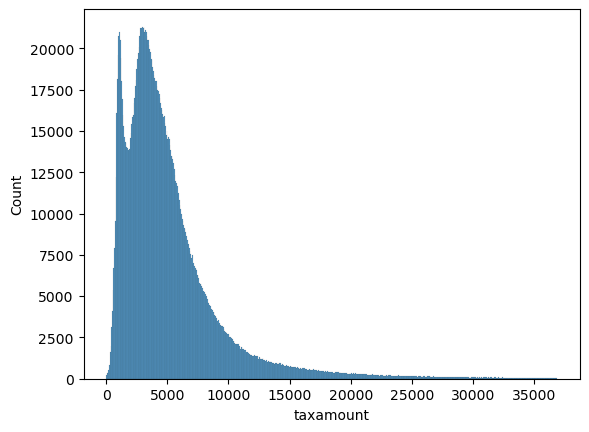

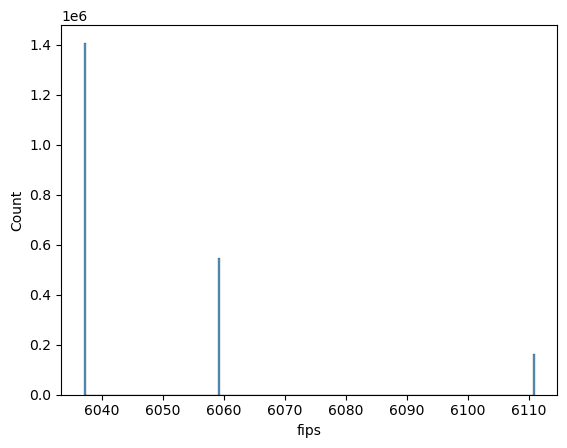

In [7]:
w.plot_histograms(df)

In [4]:
def remove_outliers(df, exclude_column=None, threshold=4):
    """
    This function removes outliers from a pandas dataframe, with an option to exclude a single column.
    
    Args:
    df: pandas dataframe
    exclude_column: string, optional column name to exclude from outlier detection
    threshold: float, optional number of standard deviations from the mean to consider a value an outlier
    
    Returns:
    pandas dataframe with outliers removed
    """
    if exclude_column is not None:
        # Copy dataframe and drop excluded column
        df_clean = df.drop(columns=exclude_column)
    else:
        df_clean = df.copy()
    
    # Calculate z-score for each value
    z_scores = np.abs((df_clean - df_clean.mean()) / df_clean.std())
    
    # Remove rows with any value above threshold
    df_clean = df.loc[(z_scores < threshold).all(axis=1)]
    
    return df_clean

In [10]:
import pandas as pd
import pandas as pd
import numpy as np

def remove_outliers(df, column=None, sd=4):
    if column is not None:
        series = df[column]
        mean = series.mean()
        std = series.std()
        lower_bound = mean - sd * std
        upper_bound = mean + sd * std
        num_outliers = len(series[(series < lower_bound) | (series > upper_bound)])
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    else:
        mean = df.mean()
        std = df.std()
        lower_bound = mean - sd * std
        upper_bound = mean + sd * std
        num_outliers = np.sum((df < lower_bound) | (df > upper_bound))
        df = df[(df >= lower_bound) & (df <= upper_bound)]
    print(f"{num_outliers} outliers removed.")
    return df



In [11]:
remove_outliers(df, column="fips")

0 outliers removed.


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [9]:
remove_outliers(df, exclude_column="fips")

TypeError: remove_outliers() got an unexpected keyword argument 'exclude_column'

In [6]:
w.clean_zillow(df)

Removed 23169 outliers


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
11,0.0,0.0,1200.0,5328.0,1972.0,91.60,6037.0
14,0.0,0.0,171.0,6920.0,1973.0,255.17,6037.0
...,...,...,...,...,...,...,...
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56,6037.0
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [8]:
    df = df.dropna()
    df = df.drop(columns=["Unnamed: 0"])

In [26]:
def plot_boxplot(df):
    """
    Plots a histogram of each column in a pandas DataFrame using seaborn.
    
    Args:
    df (pandas.DataFrame): The DataFrame containing the data.
    """
    # Loop through each column in the DataFrame
    for col in df.columns:
        # Create a histogram using seaborn
        sns.boxplot(data=df, x=col)
        
        # Show the plot
        plt.show()


In [30]:
df[["bedroom", "bathroom","area","property_value","year", "tax"]]

,bedroom,bathroom,area,property_value,year,tax
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68
11,0.0,0.0,1200.0,5328.0,1972.0,91.60
14,0.0,0.0,171.0,6920.0,1973.0,255.17
...,...,...,...,...,...,...
2152856,4.0,4.0,4375.0,422400.0,2015.0,13877.56
2152858,4.0,3.0,2262.0,960756.0,2015.0,13494.52
2152859,4.0,4.5,3127.0,536061.0,2014.0,6244.16
2152861,3.0,2.5,1974.0,424353.0,2015.0,5302.70


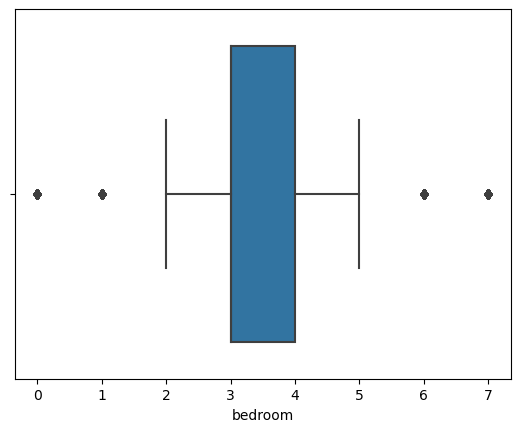

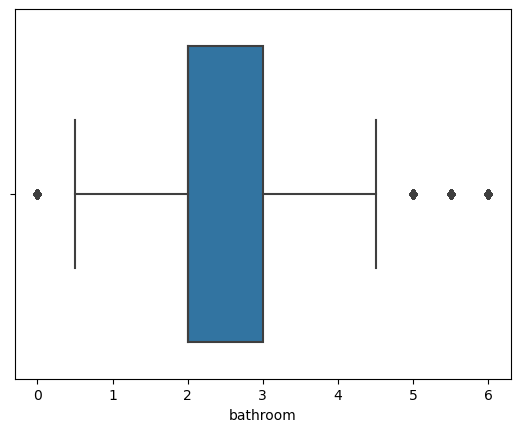

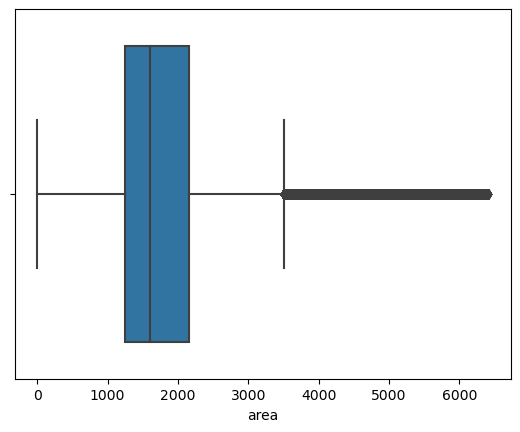

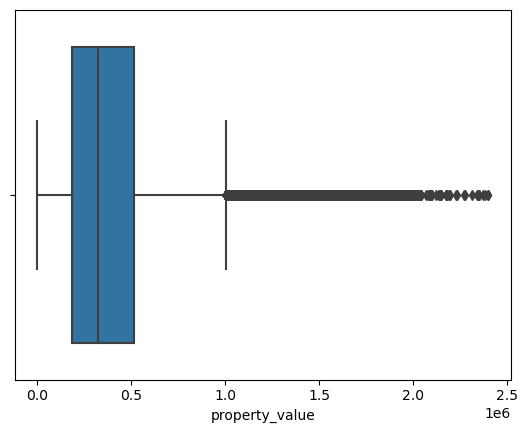

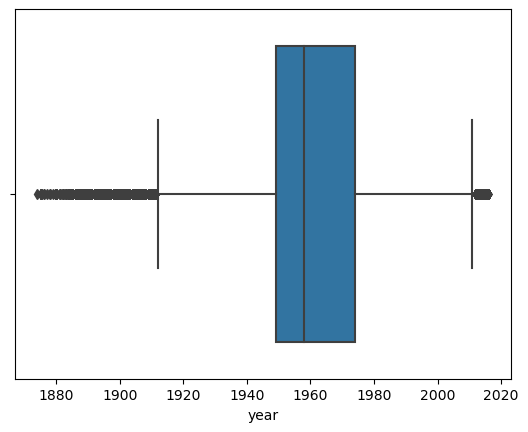

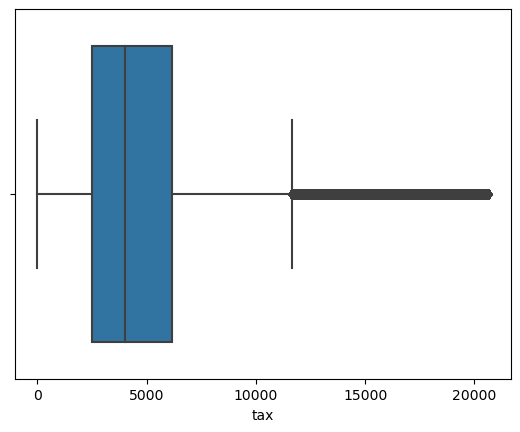

In [31]:
plot_boxplot(df[["bedroom", "bathroom","area","property_value","year", "tax"]])

In [4]:
train, val, test = w.split_clean_zillow(df)

1590 outliers removed from bedroom.
8559 outliers removed from bathroom.
4412 outliers removed from area.
18673 outliers removed from property_value.
16 outliers removed from year.
21610 outliers removed from tax.

Total of 54860 outliers removed.


NameError: name 'train_test_split' is not defined